# import

In [142]:
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage

from mne import events_from_annotations

import matplotlib.pyplot as plt

# load data for one subject

In [143]:
subject = 1
runs = [4, 8, 12]

raw_fnames = eegbci.load_data(subject, runs)
raws = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])

new_names = {ch: ch.rstrip('.').upper().replace('Z', 'z').replace('FP', 'Fp') for ch in raws.ch_names}
raws.rename_channels(new_names)

montage = make_standard_montage('standard_1005')
raws.set_montage(montage)

data, times = raws[:, :]

Extracting EDF parameters from /Users/marktaylor/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/marktaylor/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/marktaylor/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
DigMontage is a superset of info. 279 in DigMontage will be ignored. The ignored channels are: {'TP10h', 'AFp3', 'T4', 'PPO3h', 'TTP9h', 'F2h', 'POO8h', 'I2h', 'CCP4h', 'AFp4h', 'POO4', 'AFp10h', 'PPO10h', 'C6h', '

# split into trials and labels

In [144]:
events, mapping = events_from_annotations(raws)

trials = []
labels = []

rmapping = {v: k for k, v in mapping.items()}

for i in range(len(events) - 1):
    start, end, label = events[i][0], events[i+1][0], rmapping[events[i][2]]
    trials.append(data[:,start:end])
    labels.append(label)
    
start, end, label = events[-1][0], data.shape[1], rmapping[events[-1][2]]
trials.append(data[:,start:end])
labels.append(label)

Used Annotations descriptions: ['T0', 'T1', 'T2']


In [96]:
pre_name = raw_fnames[0].split('/')[-1].split('.')[0]

'S001R04'

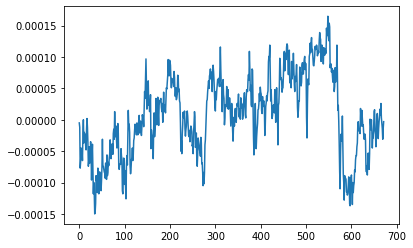

In [148]:
plt.plot(trials[0][0])